# DATACHALLENGE

Pour ce datachallenge, nous aurons besoin des modules Python ci-dessous, il vous faut donc évidemment exécuter cette première cellule.

In [153]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import sys

In [104]:
import sklearn
import scipy as sc

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import geomstats as gs

Les différentes méthodes dont nous aurons besoins

# Importation des données

Nous allons importer toutes les données qui vont nous être utiles, même celles qui ne seront pas utiles avant la fin


In [72]:
dataPath = "cortical_thickness.npy"
labelsPath = "labels.npy"

In [85]:
data  =   np.load(dataPath,allow_pickle=True)

In [57]:
labels  =   np.load(labelsPath,allow_pickle=True)

In [23]:
data[:5]

array([array([[4.85491085],
              [5.74003458],
              [6.68786335],
              ...,
              [1.23504281],
              [1.2750001 ],
              [1.11842108]]), array([[5.64812231],
                                     [5.64812231],
                                     [6.54074097],
                                     ...,
                                     [1.23626375],
                                     [1.43533242],
                                     [1.30319166]]),
       array([[10.88043499],
              [11.8590641 ],
              [10.90960217],
              ...,
              [ 1.        ],
              [ 1.0518868 ],
              [ 1.20212793]]), array([[4.46120691],
                                      [5.47523165],
                                      [6.51008129],
                                      ...,
                                      [1.18652761],
                                      [1.16525435],
                        

In [97]:
labels[:5]

array([1., 0., 0., 0., 1.])

# Visualisation et normalisation des données

(array([0.05028722, 0.09890038, 0.14685706, 0.25856558, 0.38230759,
        0.31389465, 0.312969  , 0.24147056, 0.17539473, 0.16573774,
        0.1068111 , 0.08692599, 0.07537831, 0.0497292 , 0.04457575,
        0.03138027, 0.02400131, 0.02067947, 0.01357624, 0.01007714,
        0.00980798, 0.00626949, 0.00568521, 0.00443788, 0.00384704,
        0.00391269, 0.0031249 , 0.00266535, 0.00248154, 0.00177909,
        0.00190382, 0.00134581, 0.00150993, 0.00143115, 0.00137207,
        0.00141146, 0.00144428, 0.00126703, 0.00096504, 0.00130642]),
 array([3.13460827e-04, 3.75198074e-01, 7.50082687e-01, 1.12496730e+00,
        1.49985191e+00, 1.87473653e+00, 2.24962114e+00, 2.62450575e+00,
        2.99939036e+00, 3.37427498e+00, 3.74915959e+00, 4.12404420e+00,
        4.49892882e+00, 4.87381343e+00, 5.24869804e+00, 5.62358265e+00,
        5.99846727e+00, 6.37335188e+00, 6.74823649e+00, 7.12312111e+00,
        7.49800572e+00, 7.87289033e+00, 8.24777494e+00, 8.62265956e+00,
        8.99754417e+00

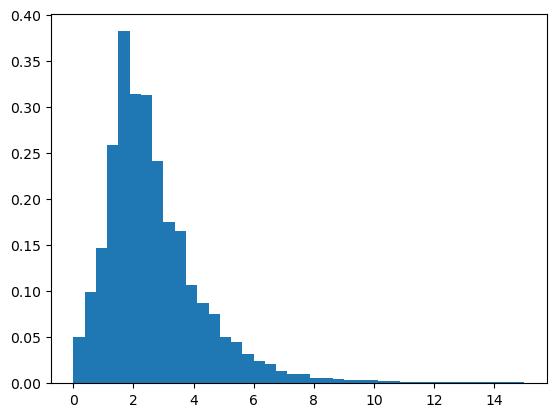

In [91]:
plt.hist(data[0], density = True,bins=40)

(array([[0.05022594, 0.09889647, 0.14683195, ..., 0.00125352, 0.00099756,
         0.0012732 ],
        [0.08244473, 0.12922924, 0.15940718, ..., 0.00233088, 0.00172819,
         0.00174997],
        [0.05736222, 0.09880505, 0.1266152 , ..., 0.00232031, 0.00176209,
         0.00230014],
        ...,
        [0.04307133, 0.08526204, 0.12226681, ..., 0.00130871, 0.00108856,
         0.00107632],
        [0.02292452, 0.04097407, 0.06003885, ..., 0.00257784, 0.00357435,
         0.00231584],
        [0.03798679, 0.05883259, 0.07902297, ..., 0.00257726, 0.00236619,
         0.00203292]]),
 array([1.19209290e-07, 3.74999115e-01, 7.49998111e-01, 1.12499711e+00,
        1.49999610e+00, 1.87499510e+00, 2.24999409e+00, 2.62499309e+00,
        2.99999208e+00, 3.37499108e+00, 3.74999008e+00, 4.12498907e+00,
        4.49998807e+00, 4.87498706e+00, 5.24998606e+00, 5.62498505e+00,
        5.99998405e+00, 6.37498305e+00, 6.74998204e+00, 7.12498104e+00,
        7.49998003e+00, 7.87497903e+00, 8.2499780

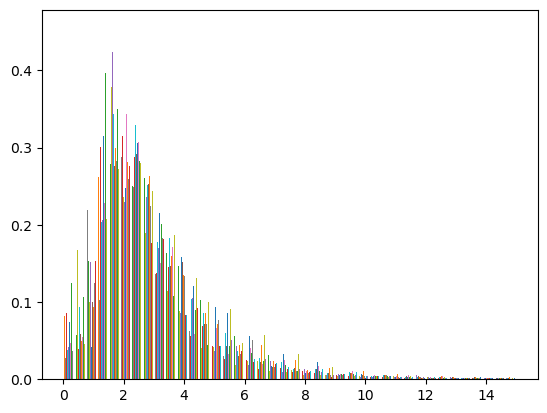

In [52]:
plt.hist(data, density = True,bins=40)

In [154]:
def normalised(vect):
    normed=np.zeros(vect.size,dtype=object)
    max = np.zeros(vect.size)
    K = vect.size
    for k in range(K):
        max[k] = np.max(data[k]) 
    
    max = np.max(max) + sys.float_info.min
    for k in range(K):
        normed[k] = vect[k] / max
    return(normed)

dataNormed = normalised(data)

(array([0.75430626, 1.4835018 , 2.20284999, 3.8784734 , 5.73459854,
        4.70840722, 4.69452247, 3.62204866, 2.63091387, 2.4860595 ,
        1.60216224, 1.30388631, 1.1306716 , 0.74593602, 0.6686344 ,
        0.47070286, 0.36001876, 0.31019122, 0.20364299, 0.15115667,
        0.14711926, 0.0940421 , 0.08527797, 0.06656802, 0.05770541,
        0.05869015, 0.04687334, 0.0399802 , 0.03722295, 0.02668629,
        0.02855729, 0.02018705, 0.02264888, 0.0214672 , 0.02058094,
        0.02117178, 0.02166415, 0.01900537, 0.01447559, 0.01959621]),
 array([2.08974443e-05, 2.50132717e-02, 5.00056460e-02, 7.49980202e-02,
        9.99903945e-02, 1.24982769e-01, 1.49975143e-01, 1.74967517e-01,
        1.99959892e-01, 2.24952266e-01, 2.49944640e-01, 2.74937014e-01,
        2.99929389e-01, 3.24921763e-01, 3.49914137e-01, 3.74906511e-01,
        3.99898886e-01, 4.24891260e-01, 4.49883634e-01, 4.74876008e-01,
        4.99868383e-01, 5.24860757e-01, 5.49853131e-01, 5.74845505e-01,
        5.99837880e-01

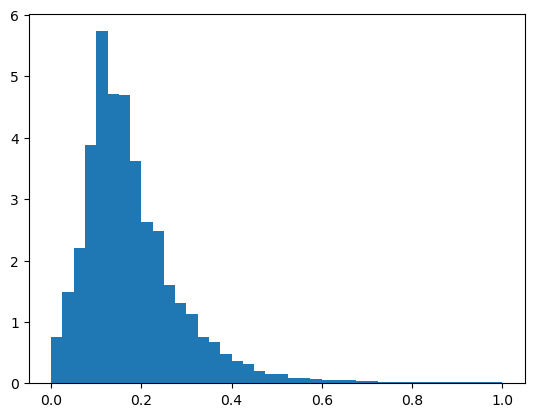

In [155]:
plt.hist(dataNormed[0], density = True,bins=40)

# Test de fit sur une loi Beta

In [168]:
mod = sc.stats.beta.fit(dataNormed[0],floc=0,fscale=1)
mod

(1.9895584882833164, 8.691934325320084, 0, 1)

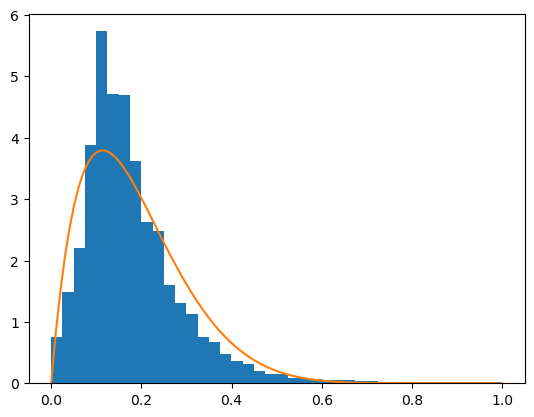

In [171]:
plt.hist(dataNormed[0], density = True,bins=40)
X = np.linspace(0,1,100)
plt.plot(X, sc.stats.beta.pdf(X, mod[0], mod[1], loc = mod[2], scale = mod[3]))

# Exemple de Découpage train / test

En apprentissage statistique, classiquement un prédicteur est ajusté sur une partie seulement des données et l'erreur de ce dernier est ensuite évaluée sur une autre partie des données disponibles. Ceci permet de ne pas utiliser les mêmes données pour ajuster et évaluer la qualité d'un prédicteur.

> En utilisant la fonction [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) de la librairie [`sklearn.model_selection`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection), on sélectionne aléatoirement 60% des observations pour l'échantillon d'apprentissage et on garde le reste pour l'échantillon de test. 

In [160]:
from sklearn import model_selection

XTrain,XTest,YTrain, YTest = model_selection.train_test_split(dataNormed, labels, test_size=0.4, train_size=0.6, random_state=0, shuffle=True, stratify=None)

# Fit de toutes les observations de Xtrain

In [175]:
nTrain = XTrain.size
modTrain = np.zeros((nTrain,2))
for k in range(nTrain):
    mod= sc.stats.beta.fit(dataNormed[0],floc=0,fscale=1)
    modTrain[k,0] = mod[0]
    modTrain[k,1] = mod[1]